In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib.animation as animation
from tqdm.notebook import tqdm, trange

from scipy.ndimage import binary_dilation

## PATHS and CONSTANTS



In [2]:
PROJECT_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/'
DATA_PATH = 'D:/Data/'
#movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
movie ='130721_CCA60_RAW'
#movie ='280523 AM100 568'
ADD_PATH = os.path.join(PROJECT_PATH, "add_data/", movie + "/")


MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'

In [3]:
spike = np.load(MOVIE_PATH + 'np/spike.npy').astype(np.float32)

In [5]:
import numpy as np
from skimage.filters import gaussian
from scipy.interpolate import griddata
from tqdm.notebook import trange, tqdm
sigma = 5
# Assuming your array is named 'spike'
filtered_spike = np.empty_like(spike)

# Iterating over the time axis
for t in trange(spike.shape[0]):
    image = spike[t]

    # Create a mask of NaN locations
    mask = np.isnan(image)

    # Coordinates of non-NaN values
    coords = np.array(np.where(~mask)).T
    values = image[~mask]

    # Coordinates of NaN values
    nan_coords = np.array(np.where(mask)).T

    # Interpolate the NaN values
    interpolated_values = griddata(coords, values, nan_coords, method='linear')

    # Place interpolated values into the image
    image[mask] = interpolated_values

    # Apply Gaussian filter to the interpolated image
    filtered_spike[t] = gaussian(image, sigma=sigma)  # Change sigma for desired level of blurring
    filtered_spike[t][mask] = np.nan  # Replace NaN values



  0%|          | 0/62 [00:00<?, ?it/s]

In [22]:
np.save(MOVIE_PATH + 'tmp/filtered_spike.npy', filtered_spike)

In [3]:
filtered_spike = np.load(MOVIE_PATH + 'tmp/filtered_spike.npy')

#<span style="color:red">CUrvature with soble filter</span>

In [4]:
from skimage.filters import sobel_h, sobel_v
def gaussian_curvature(surface):
    nan_mask = np.isnan(surface)
    dilated_nan_mask = binary_dilation(nan_mask)
    # Compute the partial derivatives of the surface using convolution
    dx = sobel_h(surface)
    dy = sobel_v(surface)
    dxx = sobel_h(dx)
    dyy = sobel_v(dy)
    dxy = sobel_v(dx)
    # Compute the curvature
    curvature = (dxx * dyy - dxy**2) / (1 + dx**2 + dy**2)**2
    curvature[dilated_nan_mask] = np.nan
    return curvature

In [8]:
t = 32
sigma = 1.5


z = filtered_spike[t]
curvature = gaussian_curvature(z)


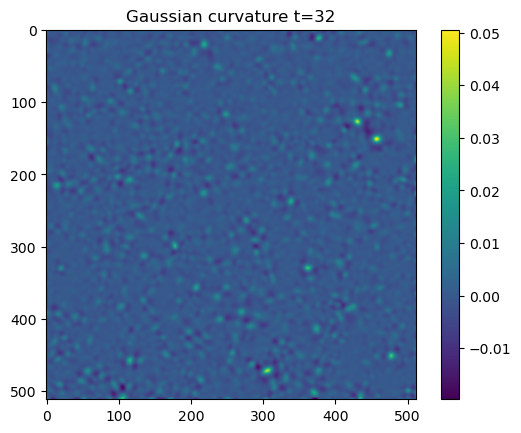

In [9]:
import matplotlib.pyplot as plt
plt.imshow(curvature)

plt.colorbar()
plt.title('Gaussian curvature t=%d' % t)
plt.show()


In [ ]:
#make animation of curtvature of spike each frame is a time point

In [5]:

curvature = np.zeros_like(spike)
sigma = 1.5
= plt.cm.viridis  # Choose the colormap you prefer
cmap.set_bad(color='red')
cbar = plt.colorbar(plot)

for t,img in tqdm(enumerate(spike)):
    z = filtered_spike[t]  # Some example data with noise
    curvature[t] = gaussian_curvature(z)

fig = plt.figure()
ax = fig.add_subplot(111)
# Create an empty plot
plot = ax.imshow(curvature[0], cmap = cmap,vmin=np.nanmean(curvature), vmax = np.nanmax(curvature) ,animated=True)

cmap = plt.cm.viridis  # Choose the colormap you prefer
cmap.set_bad(color='red')
cbar = plt.colorbar(plot)

plt.xlabel('X (Pixels)')
plt.ylabel('Y (Pixels)')

def update_frame(t):
    ax.imshow(curvature[t],vmin=np.nanmean(curvature), vmax = np.nanmax(curvature), cmap=cmap)

    #ax.set_title('movie %s Frame: %d \n Intesity projection \n i =  %d -  %d' % (movie,t,i,i+i_gap))
    ax.set_title('%s \n Gaussian Curvature time %d' % (movie,t    ))
    # Highlight the specified coordinates
    #plot.axes.plot(x_coord, y_coord, 'ro')

    return plot,

# Create the animation
myanimation = animation.FuncAnimation(fig, update_frame, frames=range(len(spike)), interval=1000, blit=True)
writer = animation.FFMpegWriter(fps=1)

myanimation.save(GRAPH_PATH + 'curvature/' + movie + 'Gaussian Curvature.mp4', writer=writer)

SyntaxError: invalid syntax (2021804501.py, line 3)

In [5]:

curvature = np.zeros_like(filtered_spike)
sigma = 5
for t,img in enumerate(filtered_spike):
    z = img  # Some example data with noise
    curvature[t] = gaussian_curvature(z)


In [6]:
#reload graph utils
import importlib
import utils.graph_utils.values_3d


ModuleNotFoundError: No module named 'utils.graph_utils.values_3d'; 'utils.graph_utils' is not a package

In [0]:
from  utils.graph_utils import values_3d as values_3d
gel = np.load(MOVIE_PATH + 'np/gel.npy', mmap_mode='r')
c = []
t_list = []
i_list = []
intensity = values_3d(gel, filtered_spike)

for t in range(len(curvature)):
    nan_mask = np.bitwise_or(np.isnan(curvature[t]), np.isnan(filtered_spike[t]))
    if np.sum(~nan_mask) == 0:
        continue
    else:
        #c.append(np.corrcoef(curvature[t][~nan_mask], filtered_spike[t][~nan_mask])[0,1])
        t_list.append(t)
        i_list.append(np.corrcoef(intensity[t][~nan_mask], filtered_spike[t][~nan_mask])[0,1])
#plt.scatter(t_list,c)

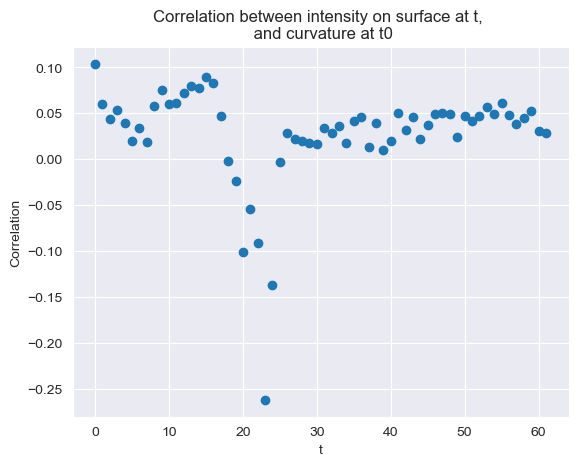

In [11]:
plt.scatter(t_list,i_list)
plt.title('Correlation between intensity on surface at t, \n and curvature at t0')
plt.xlabel('t')
plt.ylabel('Correlation')
plt.show()


In [9]:
np.save(MOVIE_PATH + 'tmp/intensity.npy', intensity)
np.save(MOVIE_PATH + 'tmp/curvature.npy', curvature)

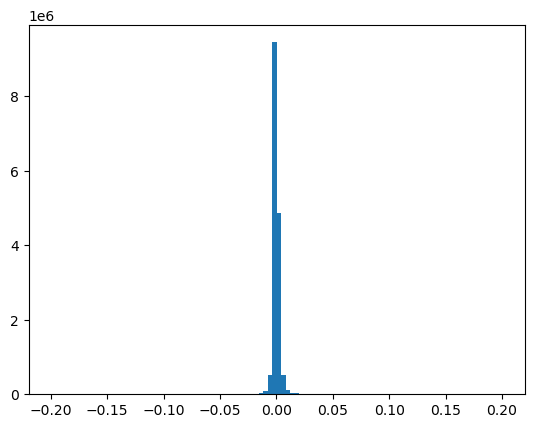

In [10]:
tmp = curvature[abs(curvature)< 0.2 ]
plt.hist(tmp.flatten(), bins = 100)
plt.show()


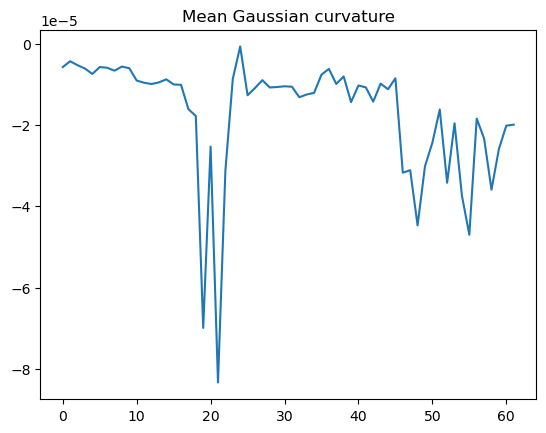

In [15]:
mean_curvature = np.nanmean(curvature, axis = (1,2))
plt.plot(mean_curvature)
plt.title('Mean Gaussian curvature')
plt.show()


In [17]:
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, Slider
from bokeh.layouts import column
from bokeh.palettes import Viridis256
from bokeh.transform import transform
from bokeh.models.sources import ColumnDataSource
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application

output_notebook()

def modify_doc(doc):
    # Example 3D data
    data_3d = curvature  # Replace this with your 3D array

    # Create ColumnDataSource
    source = ColumnDataSource(data={'image': [data_3d[0,:, :]]})

    # Set up plot
    p = figure(width=500, height=500, x_range=(0, 10), y_range=(0, 10), title="Animated 3D Array")
    p.image(image='image', x=0, y=0, dw=10, dh=10, source=source, color_mapper=LinearColorMapper(palette=Viridis256))

    # Set up slider
    slider = Slider(start=0, end=data_3d.shape[0]-1, value=0, step=1, title="Index")

    # Update function
    def update(attr, old, new):
        source.data = {'image': [data_3d[slider.value,:, :]]}

    slider.on_change('value', update)

    # Organize layout
    layout = column(p, slider)

    # Add to doc
    doc.add_root(layout)

handler = FunctionHandler(modify_doc)
app = Application(handler)
show(app)


Loading BokehJS ...